In [ ]:
import zipfile
import os

zip_file_path = "/content/Img"
output_directory = "/content/Images"

os.makedirs(output_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print("Files extracted to:", output_directory)


Files extracted to: /content/Images


In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf

data_dir = '/content/Images/New folder'

def preprocess_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    folders = os.listdir(data_dir)

    for folder in folders:
        folder_path = os.path.join(data_dir, folder)
        image_paths = glob(f'{folder_path}/*')

        for image_path in image_paths:
            try:
                img = cv2.imread(image_path)
                img = cv2.resize(img, image_size) / 255.0
                images.append(img)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    return np.array(images)

all_images = preprocess_images(data_dir)
print(f"Loaded {all_images.shape[0]} images with shape {all_images.shape[1:]}.")



Loaded 4945 images with shape (128, 128, 3).


In [ ]:
train_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)
print(f"Training images: {train_images.shape[0]}, Testing images: {test_images.shape[0]}")


Training images: 3956, Testing images: 989


In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [ ]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

def build_llnet(input_shape=(128, 128, 3)):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)

    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(inputs, outputs)
    return model

llnet_model = build_llnet()
llnet_model.compile(optimizer='adam', loss='mse', metrics=['mse'])
llnet_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 128, 128, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483,267 (1.84 MB)

 Trainable params: 483,267 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from zipfile import ZipFile
dataset = '/content/lo.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("done")


done


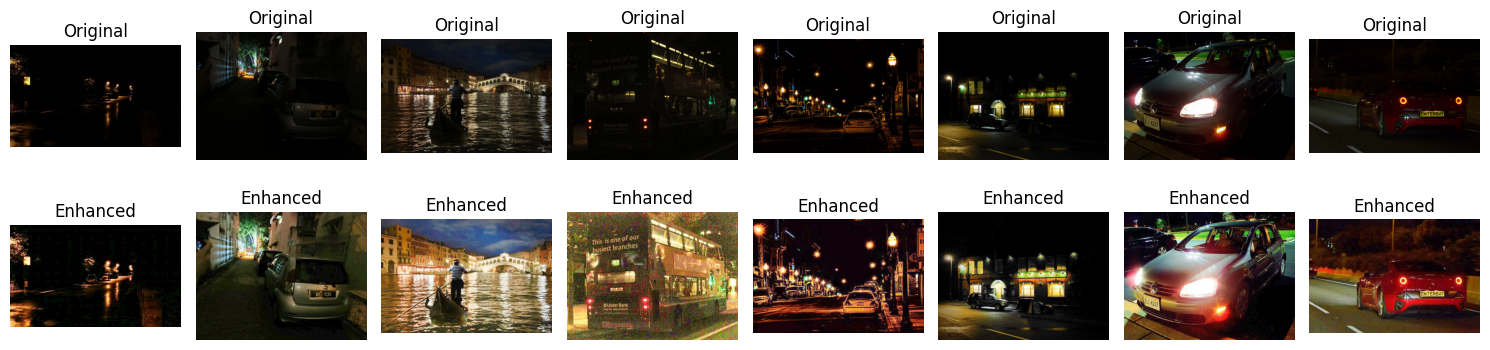

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

input_folder = '/content/lo'
output_folder = '/content/br'

input_images = sorted(os.listdir(input_folder))
output_images = sorted(os.listdir(output_folder))

num_images = len(input_images)
fig, axes = plt.subplots(2, num_images, figsize=(15, 4))

for i in range(num_images):
    # Load original and enhanced images
    original = Image.open(os.path.join(input_folder, input_images[i]))
    enhanced = Image.open(os.path.join(output_folder, output_images[i]))

    # Display original images in the first row
    axes[0, i].imshow(original)
    axes[0, i].set_title(f'Original')
    axes[0, i].axis('off')

    # Display enhanced images in the second row
    axes[1, i].imshow(enhanced)
    axes[1, i].set_title(f'Enhanced')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

def combined_mse_ssim_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    ssim_loss = 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return mse_loss + 1.0 * ssim_loss

llnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss=combined_mse_ssim_loss, metrics=['mse', 'mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_llnet_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = llnet_model.fit(
    train_images, train_images,
    epochs=20,
    batch_size=16,
    validation_data=(test_images, test_images),
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Training and Validation MSE')

plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Training and Validation MAE')

plt.tight_layout()
plt.show()
